In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
'''
def rk4(func, t, h, y, *x)
4次のルンゲ・クッタ法を一回分計算する関数
    引数リスト
    func:導関数
    t：現在時刻を表す変数
    h：刻み幅
    y：出力変数（求めたい値）
    *x:引数の数が可変する事に対応する、その他の必要変数
※この関数では時刻は更新されないため、これとは別に時間更新をする必要があります。
'''
def rk4(func, t, h, y, *x):
    k1=h*func(t, y, *x)
    k2=h*func(t+0.5*h, y+0.5*k1, *x)
    k3=h*func(t+0.5*h, y+0.5*k2, *x) 
    k4=h*func(t+h, y+k3, *x)
    y=y+(k1 + 2*k2 + 2*k3 + k4)/6
    return y

'''
導関数の書き方
def func(t, y, *state):
    func:自分で好きな関数名をつけられます
    t:時刻変数(変数の文字はtで無くても良い) 
    y:出力変数(変数の文字はyで無くても良い)
    *state:その他の必要変数(引数の数は可変可能))
#関数サンプル
def vdot(t, y, *state):
    s1=state[0]
    s2=state[1]
    return t+y+s1+s2
    
'''


'\n導関数の書き方\ndef func(t, y, *state):\n    func:自分で好きな関数名をつけられます\n    t:時刻変数(変数の文字はtで無くても良い) \n    y:出力変数(変数の文字はyで無くても良い)\n    *state:その他の必要変数(引数の数は可変可能))\n#関数サンプル\ndef vdot(t, y, *state):\n    s1=state[0]\n    s2=state[1]\n    return t+y+s1+s2\n    \n'

In [3]:
#慣性モーメント計算
Ixx=1
Iyy=2
Izz=0.5

In [4]:
#導関数定義

def pdot(t, p, q, r):
    return -(Izz-Iyy)*q*r/Ixx

def qdot(t, q, p, r):
    return -(Ixx-Izz)*p*r/Iyy

def rdot(t, r, p, q):
    return -(Iyy-Ixx)*p*q/Ixx

def q1dot(t, q1, q2, q3, q4, p, q, r):
    return 0.5*( r*q2 -q*q3 +p*q4)

def q2dot(t, q2, q1, q3, q4, p, q, r):
    return 0.5*(-r*q1 +p*q3 +q*q4)

def q3dot(t, q3, q1, q2, q4, p, q, r):
    return 0.5*( q*q1 -p*q2 +r*q4)

def q4dot(t, q4, q1, q2, q3, p, q, r):
    return 0.5*(-p*q1 -q*q2 -r*q3)



In [5]:
def euler2dcm(euler):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    return((e11,e12,e13),(e21,e22,e23),(e31,e32,e33))

def dcm2euler(e):
    phi=np.arctan2(e[1][2], e[2][2])
    theta=np.arctan2(-e[0][2], np.sqrt(e[1][2]**2 + e[2][2]**2))
    psi=np.arctan2(e[0][1], e[0][0])
    
    return (phi, theta, psi)

def quat2dcm(q):
    q1=q[0]
    q2=q[1]
    q3=q[2]
    q4=q[3]
    
    e11=   q1**2 - q2**2 - q3**2 + q4**2
    e12= 2 * (q1*q2 + q3*q4)
    e13= 2 * (q1*q3 - q2*q4)
    
    e21= 2 * (q1*q2 - q3*q4)
    e22= - q1**2 + q2**2 - q3**2 + q4**2
    e23= 2 * (q2*q3 + q1*q4)
    
    e31= 2 * (q1*q3 + q2*q4)
    e32= 2 * (q2*q3 - q1*q4)
    e33= - q1**2 - q2**2 + q3**2 + q4**2
    
    return((e11,e12,e13),(e21,e22,e23),(e31,e32,e33))

def dcm2quat(e):
    e11=e[0][0]
    e12=e[0][1]
    e13=e[0][2]
    e21=e[1][0]
    e22=e[1][1]
    e23=e[1][2]
    e31=e[2][0]
    e32=e[2][1]
    e33=e[2][2]
    
    q1=0.5*np.sqrt(1 + e11 - e22 - e33)
    q2=0.5*np.sqrt(1 - e11 + e22 - e33)
    q3=0.5*np.sqrt(1 - e11 - e22 + e33)
    q4=0.5*np.sqrt(1 + e11 + e22 + e33)
    
    q=[q1, q2, q3, q4]
    idx=q.index(max(q))
    
    if idx==0:
        q[1]=( e12+e21)/4/q1
        q[2]=( e13+e31)/4/q1
        q[3]=( e23-e32)/4/q1
    elif idx==1:
        q[0]=( e12+e21)/4/q2
        q[2]=( e23+e32)/4/q2
        q[3]=(-e13+e31)/4/q2
    elif idx==2:
        q[0]=( e13+e31)/4/q3
        q[1]=( e23+e32)/4/q3
        q[3]=( e12-e21)/4/q3
    elif idx==3:
        q[0]=( e23-e32)/4/q4
        q[1]=(-e13+e31)/4/q4
        q[2]=( e12+e21)/4/q4

    return q

In [62]:
#求解ループ
def main():
    #初期化
    t=0.0
    p=36*np.pi/180
    q=0.01
    r=0.01
    phi=0
    theta=0
    psi=0
    quat=dcm2quat(euler2dcm((phi,theta,psi)))
    q1=quat[0]
    q2=quat[1]
    q3=quat[2]
    q4=quat[3]
    
    T=[]
    P=[]
    Q=[]
    R=[]
    Q1=[]
    Q2=[]
    Q3=[]
    Q4=[]
    Phi=[]
    Theta=[]
    Psi=[]
    
    h=1e-2 #刻み幅
    
    endtime=200.0
    Num=int(endtime/h)+1

    #求解ループ
    for n in range(Num):
        T.append(t)
        P.append(p)
        Q.append(q)
        R.append(r)
        Q1.append(q1)
        Q2.append(q2)
        Q3.append(q3)
        Q4.append(q4)
        Phi.append(phi)
        Theta.append(theta)
        Psi.append(psi)        

        pold=p
        qold=q
        rold=r
        q1old=q1
        q2old=q2
        q3old=q3
        q4old=q4
        
        #ルンゲ・クッタ
        p=rk4(pdot, t, h, pold, qold, rold)
        q=rk4(qdot, t, h, qold, pold, rold)
        r=rk4(rdot, t, h, rold, pold, qold)
        q1=rk4(q1dot, t, h, q1old, q2old, q3old, q4old, pold, qold, rold)
        q2=rk4(q2dot, t, h, q2old, q1old, q3old, q4old, pold, qold, rold)
        q3=rk4(q3dot, t, h, q3old, q1old, q2old, q4old, pold, qold, rold)
        q4=rk4(q4dot, t, h, q4old, q1old, q2old, q3old, pold, qold, rold)
        t=t+h

        euler=dcm2euler(quat2dcm((q1, q2, q3, q4)))
        phi=euler[0]
        theta=euler[1]
        psi=euler[2]
        
    T.append(t)
    P.append(p)
    Q.append(q)
    R.append(r)
    Q1.append(q1)
    Q2.append(q2)
    Q3.append(q3)
    Q4.append(q4)
    Phi.append(phi)
    Theta.append(theta)
    Psi.append(psi)        

    T=np.array(T)
    P=np.array(P)
    Q=np.array(Q)
    R=np.array(R)
    Q1=np.array(Q2)
    Q2=np.array(Q2)
    Q3=np.array(Q3)
    Q4=np.array(Q4)
    Phi=np.array(Phi)
    Theta=np.array(Theta)
    Psi=np.array(Psi)
    
    
    plt.figure(figsize=(10,20))
    plt.rcParams["font.size"] = 18
    
    plt.subplot('611')
    plt.plot(T, P, label='p')
    #plt.plot(T, Q, label='q')
    #plt.plot(T, R, label='r')
    plt.legend()
    plt.ylabel('Roll Rate(rad/s)')
    plt.grid()

    plt.subplot('612')
    #plt.plot(T, P, label='p')
    plt.plot(T, Q, label='q')
    #plt.plot(T, R, label='r')
    plt.legend()
    plt.ylabel('Pitch Rate(rad/s)')
    plt.grid()

    plt.subplot('613')
    #plt.plot(T, P, label='p')
    #plt.plot(T, Q, label='q')
    plt.plot(T, R, label='r')
    plt.legend()
    plt.ylabel('Yaw Rate(rad/s)')
    plt.grid()

    plt.subplot('614')
    plt.plot(T, Phi*180/np.pi, label='phi')
    plt.legend()
    plt.ylabel('Roll Angle(deg)')
    plt.grid()

    plt.subplot('615')
    plt.plot(T, Theta*180/np.pi, label='theta')
    plt.legend()
    plt.ylabel('Pitch Angle(deg)')
    plt.grid()

    plt.subplot('616')
    plt.plot(T, Psi*180/np.pi, label='psi')
    plt.legend()
    plt.ylabel('Yaw Angle(deg)')
    plt.grid()
    plt.xlabel('Time(s)')
    plt.show()

    plt.figure(figsize=(10,20))

    plt.subplot('411')
    plt.plot(T,Q1, label='q1')
    plt.legend()
    plt.grid()
    
    plt.subplot('412')
    plt.plot(T,Q2, label='q2')
    plt.legend()
    plt.grid()

    plt.subplot('413')
    plt.plot(T,Q3, label='q3')
    plt.legend()
    plt.grid()

    plt.subplot('414')
    plt.plot(T,Q4, label='q4')
    plt.legend()
    plt.xlabel('Time(s)')
    plt.grid()

    return (Phi,Theta,Psi)

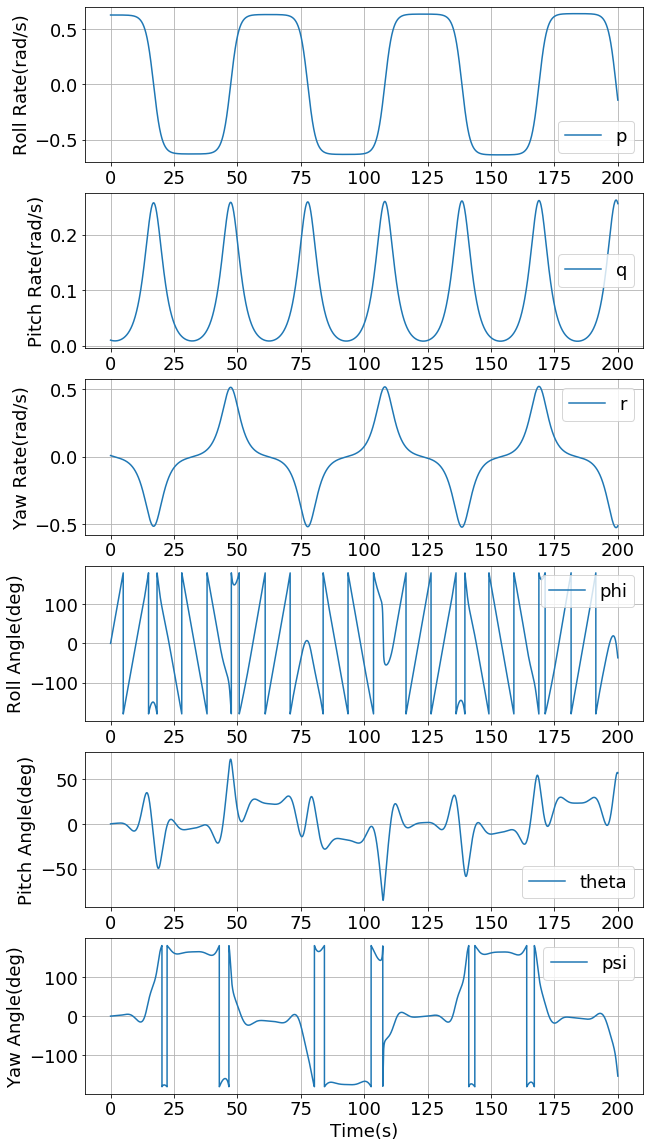

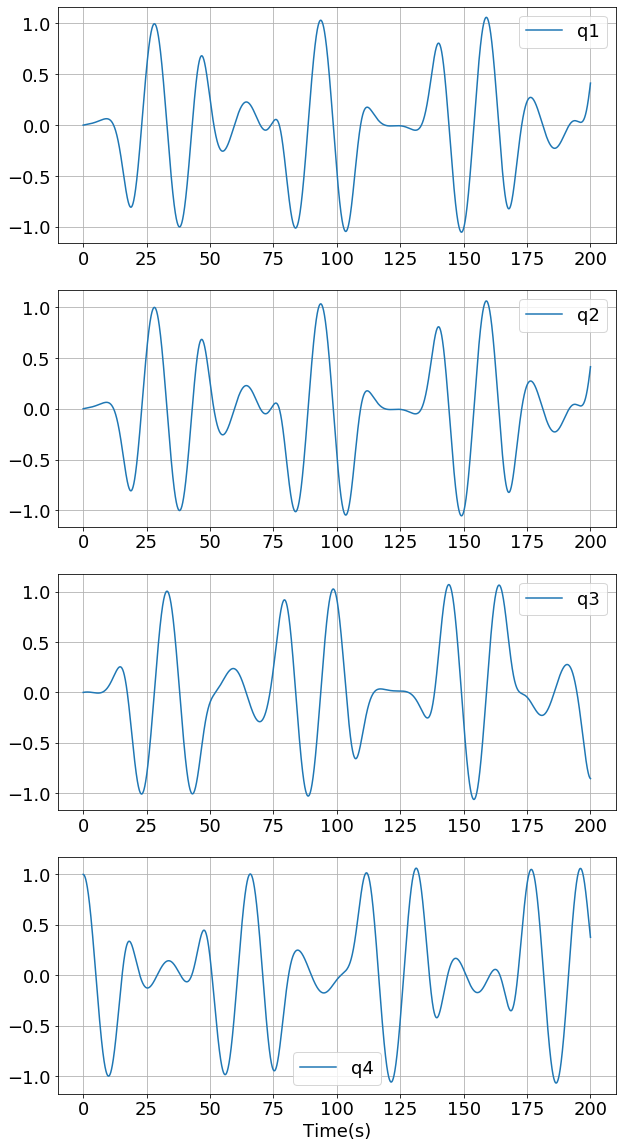

In [63]:
Phi,Theta,Psi=main()

In [89]:
#animetion

def rot(euler,p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e12*y1 + e13*z1
    y2=e21*x1 + e22*y1 + e23*z1
    z2=e31*x1 + e32*y1 + e33*z1
    
    
    return (x2,y2,z2)

def invrot(euler, p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e21*y1 + e31*z1
    y2=e12*x1 + e22*y1 + e32*z1
    z2=e13*x1 + e23*y1 + e33*z1
    
    
    return (x2,y2,z2)
 

def tr(mv, p):
    x1=p[0]
    y1=p[1]
    z1=p[2]
    dx=mv[0]
    dy=mv[1]
    dz=mv[2]
    
    x2=x1+dx
    y2=y1+dy
    z2=z1=dz
    
    return (x2, y2, z2)

def pers(f,p):
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    x2=f*x1/z1
    y2=f*y1/z1
    
    return (x2, y2)


def draw_T_handle(euler):
    p1=(-1.5, -2.0, 0.0)
    p2=(-1.5,  2.0, 0.0)
    p3=(-1.5,  0.0, 0.0)
    p4=( 2.5,  0.0, 0.0)
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    
    p1=invrot((phi, theta, psi), p1)
    p2=invrot((phi, theta, psi), p2)
    p3=invrot((phi, theta, psi), p3)
    p4=invrot((phi, theta, psi), p4)
    
    #カメラ変換
    
    phi=45*np.pi/180
    theta=0*np.pi/180
    psi=30*np.pi/180
    
    p1r=rot((phi, theta, psi), p1)
    p2r=rot((phi, theta, psi), p2)
    p3r=rot((phi, theta, psi), p3)
    p4r=rot((phi, theta, psi), p4)

    p1t=tr((0,0,10),p1r)
    p2t=tr((0,0,10),p2r)
    p3t=tr((0,0,10),p3r)
    p4t=tr((0,0,10),p4r)
    
    p1d=pers(9,p1t)
    p2d=pers(9,p2t)
    p3d=pers(9,p3t)
    p4d=pers(9,p4t)
    
    plt.figure(figsize=(10,10))
    plt.plot((p1d[0],p2d[0]),(p1d[1],p2d[1]),lw=10, c='r')
    plt.plot((p3d[0],p4d[0]),(p3d[1],p4d[1]),lw=10, c='r')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.savefig('Thandleimg/Thandleimg{:04d}'.format(index))
    plt.close()

index=0
phis=Phi[0:len(Phi)-1:50]
thetas=Theta[0:len(Theta)-1:50]
psis=Psi[0:len(Psi)-1:50]


for phi,theta,psi in zip(phis,thetas,psis):
    draw_T_handle((phi,theta,psi))
    index+=1
    #if index==10:
    #    break
    

In [71]:
Phi[0:20002:1000]

array([ 0.        ,  0.00364317,  1.76819776,  1.92604681,  1.92691246,
        2.84358985,  2.53198581,  2.58142974, -0.92732051, -0.84861667,
       -0.94151888, -0.73934845, -0.91126176, -0.83122686,  2.83326235,
        2.61707673,  2.52837759,  2.83812273,  2.13731208,  2.24055424,
       -0.63131111])

In [81]:
phis

array([ 0.        ,  0.62840978,  1.25691279,  1.88544591,  2.51398997,
       -3.14081988, -2.51314074, -1.88636801, -1.25877783, -0.62755062,
        0.00364317,  0.61859207,  1.20646534,  1.7987184 ,  2.47044288,
       -3.12513459, -2.70032219, -2.62270347, -2.93868458,  2.55118159,
        1.76819776,  1.18754581,  0.63304297,  0.04025728, -0.58098054,
       -1.20756531, -1.83313568, -2.46095106, -3.09219738,  2.55829681,
        1.92604681,  1.2946521 ,  0.66371909,  0.03288205, -0.59782273,
       -1.2279867 , -1.85727304, -2.48570459, -3.11273375,  2.54693119,
        1.92691246,  1.29947994,  0.64604744, -0.01466528, -0.59558258,
       -1.04292096, -1.41977408, -2.13545595,  2.78063863,  2.61244125,
        2.84358985, -3.01293713, -2.48230605, -1.9147655 , -1.32465906,
       -0.70218022, -0.05077178,  0.60931384,  1.26087136,  1.90032315,
        2.53198581, -3.12232695, -2.49337757, -1.86392105, -1.2352466 ,
       -0.60894425,  0.0146758 ,  0.63782178,  1.26647904,  1.91